In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
page_link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
respond=requests.get(page_link)
respond.status_code

200

In [3]:
def scrape_the_data(url):
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception('page load to fail {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
doc_scrape=scrape_the_data(page_link)
def scrape_the_mobile_brand(doc_scrape):
    class_='_4rR01T'
    scrap_mobile=doc_scrape.find_all('div',{'class':class_})
    mobile_brand=[]
    for mobile in scrap_mobile:
        mobile_brand.append(mobile.text)
    return mobile_brand
def scrape_model_ram(doc_scrape):
    mobile_ram_and_row=doc_scrape.find_all('ul',{'class':'_1xgFaf'})
    ram_and_row=[]
    for ram_row in mobile_ram_and_row:
        ram_and_row.append(ram_row.text)
    return ram_and_row
def scrape_rating_mobile(doc_scrape):
    mobile_rating=[]
    rating=doc_scrape.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
    return mobile_rating
def scrape_mobile_price(doc_scrape):
    mobile_price=doc_scrape.find_all('div',{'class':'_30jeq3 _1_WHN1'})
    price=[]
    for price_of_mobile in mobile_price:
        price.append(price_of_mobile.text)
    return price
    

In [4]:
print(len(scrape_the_mobile_brand(doc_scrape)))
print(len(scrape_model_ram(doc_scrape)))
print(len(scrape_rating_mobile(doc_scrape)))
print(len(scrape_mobile_price(doc_scrape)))

8
8
8
8


In [33]:
def scrape_the_entire_data(url):
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception ('faild to load the page {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    all_information_about_phone={
        'Mobile_Model':scrape_the_mobile_brand(doc_scrape),
        'Prices':scrape_mobile_price(doc_scrape),
        'Rating':scrape_rating_mobile(doc_scrape),
        'RAM_ROM':scrape_model_ram(doc_scrape)

        
    }
    return pd.DataFrame(all_information_about_phone)
data=scrape_the_entire_data(page_link)
data

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7 (Snow, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
3,"Google Pixel 7 (Obsidian, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
4,"Google Pixel 7 (Lemongrass, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
5,"Google Pixel 7 Pro (Hazel, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...
6,"Google Pixel 7 Pro (Obsidian, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...
7,"Google Pixel 7 Pro (Snow, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...


In [34]:
data.to_csv('Googl pixel.csv',index=False)

In [7]:
def realme_mobile_scrape():
    page_url='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_1_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp2&fm=neo%2Fmerchandising&iid=M_613df34d-5b30-4ff4-b61b-23cab121b2be_5.Q1PDG4YW86MF&ppt=None&ppn=None&ssid=ysbf1np0280000001682747411685'
    respond=requests.get(page_url)
    if respond.status_code !=200:
        raise Exception('faild to load the page {}'.format(page_url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
html_code=realme_mobile_scrape()
    

In [19]:
print(len(mobile_brand))
print(len(prices))
print(len(ratings))
print(len(ram_and_row))

24
24
23
24


In [10]:
pages=13
for i in range(1,pages+1):
    page_link=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    respond=requests.get(page_link)
    web_page=BeautifulSoup(respond.text,'html.parser')
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)

In [ ]:
len(ratings)

In [25]:

page=11
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_1_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp2&fm=neo%2Fmerchandising&iid=M_613df34d-5b30-4ff4-b61b-23cab121b2be_5.Q1PDG4YW86MF&ppt=None&ppn=None&ssid=ysbf1np0280000001682747411685&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand[:22],
    'Prices':prices[:22],
    'Rating':ratings,
    'RAM_ROM':ram_and_row[:22]
      }
#covert to the dataframe
realme=pd.DataFrame(all_realme_mobile_information)
realme

,Mobile_Model,Prices,Rating,RAM_ROM
0,"realme C2 (Diamond Black, 32 GB)","₹8,999",4.4,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
1,"realme C15 Qualcomm Edition (Power Silver, 32 GB)","₹11,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
2,"realme 9 Pro 5G (Aurora Green, 128 GB)","₹18,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
3,"realme 2 (Diamond Black, 32 GB)","₹9,290",4.5,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
4,"realme C25s (Watery Grey, 64GB)(4GB RAM) (Wate...","₹10,099",4.5,4 GB RAM | 64 GB ROM16.51 cm (6.5 inch) Displa...
5,"realme 9 5G Speed Edition (Azure Glow,128GB)(8...","₹18,999",4.5,8 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Displ...
6,"realme 2 Pro (Black Sea, 128 GB)","₹17,990",4.5,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
7,"realme 5i (Forest Green, 64 GB)","₹10,999",4.5,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
8,"realme 5i (Aqua Blue, 128 GB)","₹11,999",4.5,4 GB RAM | 128 GB ROM16.56 cm (6.52 inch) HD+ ...
9,"realme 5i (Aqua Blue, 64 GB)","₹10,999",4.4,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...


In [26]:
realme.to_csv('realme.csv',index=True)

In [14]:
page=6
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DPOCO&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_2_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_O1WYX08RHODP_wp2&fm=neo%2Fmerchandising&iid=M_ce62148f-4355-4ffd-8dc7-e45de3ef0718_5.O1WYX08RHODP&ppt=browse&ppn=browse&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
poco=pd.DataFrame(all_realme_mobile_information)
poco

,Mobile_Model,Prices,Rating,RAM_ROM
0,"POCO M3 Pro 5G (Power Black, 64 GB)","₹15,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"POCO M3 (Power Black, 64 GB)","₹11,899",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
2,"POCO X2 (Atlantis Blue, 256 GB)","₹20,999",4.5,8 GB RAM | 256 GB ROM | Expandable Upto 512 GB...
3,"POCO X2 (Atlantis Blue, 128 GB)","₹18,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
4,"POCO F1 (Steel Blue, 128 GB)","₹15,990",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
5,"POCO M2 (Brick Red, 64 GB)","₹12,949",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
6,"POCO M2 Pro (Out of the Blue, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
7,"POCO M2 Pro (Two Shades of Black, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
8,"POCO F3 GT 5G (Gunmetal Silver, 128 GB)","₹32,999",4.3,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
9,"POCO F1 (Graphite Black, 128 GB)","₹24,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...


In [15]:
poco.to_csv('poco.csv',index=True)

In [16]:
page=5
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_4_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_YN2R24UWDDQ8_wp2&fm=neo%2Fmerchandising&iid=M_666daf6b-ff1c-407e-889d-fb17f2bb837f_5.YN2R24UWDDQ8&ppt=browse&ppn=browse&ssid=06jtchnklc0000001682751391582&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
oppo=pd.DataFrame(all_realme_mobile_information)
oppo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"OPPO F15 (Blazing Blue, 128 GB)","₹22,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
1,"OPPO F15 (Unicorn White, 128 GB)","₹22,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
2,"OPPO A31 (Mystery Black, 128 GB)","₹14,096",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
3,"OPPO A55 (Rainbow Blue, 64 GB)","₹14,489",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
4,"OPPO A74 5G BLACK (Fluid Black, 128 GB)","₹17,899",4.3,6 GB RAM | 128 GB ROM16.48 cm (6.49 inch) Disp...
5,"OPPO A12 (Deep Blue, 64 GB)","₹10,990",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
6,"OPPO A15S (Fancy White, 64 GB)","₹11,889",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) Displ...
7,"OPPO A16 (Royal Gold, 64 GB)","₹12,990",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
8,"OPPO A96 (Sunset Blue, 128 GB)","₹17,999",4.3,8 GB RAM | 128 GB ROM16.74 cm (6.59 inch) Full...
9,"OPPO F19 Pro+ 5G (Space Silver, 128 GB)","₹19,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...


In [17]:
oppo.to_csv('oppo.csv',index=True)

In [20]:
page=12
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand[:23],
    'Prices':prices[:23],
    'Rating':ratings,
    'RAM_ROM':ram_and_row[:23]
      }
#covert to the dataframe
vivo=pd.DataFrame(all_realme_mobile_information)
vivo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"vivo X70 Pro (Aurora Dawn, 256 GB)","₹52,990",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
1,"vivo X70 Pro (Cosmic Black, 256 GB)","₹49,990",4.5,8 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Full...
2,"vivo S1 Pro (Jazzy Blue, 128 GB)","₹18,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
3,"vivo Y75 5G (Glowing Galaxy, 128 GB)","₹21,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
4,"vivo S1 Pro (Mystic Black, 128 GB)","₹18,950",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
5,"vivo X70 Pro (Cosmic Black, 256 GB)","₹52,990",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
6,"vivo X70 Pro (Aurora Dawn, 128 GB)","₹46,990",4.5,8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...
7,"vivo X70 Pro (Cosmic Black, 128 GB)","₹46,990",4.5,8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...
8,"vivo X80 Pro (Cosmic Black, 256 GB)","₹79,999",4.4,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Qua...
9,"vivo X60 Pro (Midnight Black, 256 GB)","₹45,100",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...


In [22]:
vivo.to_csv('vivo.csv',index=True)

In [ ]:

def scrape_vivo_mobiles(page):
    all_vivo_mobile_information = {
        'Mobile_Model': [],
        'Prices': [],
        'Rating': [],
        'RAM_ROM': []
    }
    
    for i in range(1, page + 1):
        pages_url = f'https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_7_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_OUJ0NDXWZCCJ_wp2&fm=neo%2Fmerchandising&iid=M_5530f5fb-400f-4351-951b-a74c25b09fcd_5.OUJ0NDXWZCCJ&ppt=browse&ppn=browse&ssid=bnhf0wor340000001682752199809&page={i}'
        respond = requests.get(pages_url)
        web_page = BeautifulSoup(respond.text, 'html.parser')
        mobile_brand = []
        mobile_brand_realme = web_page.find_all('div', {'class': '_4rR01T'})
        for mobile in mobile_brand_realme:
            mobile_brand.append(mobile.text)
        prices = []
        realme_price = web_page.find_all('div', {'class': '_30jeq3'})
        for price in realme_price:
            prices.append(price.text)
        ratings = []
        realme_rating = web_page.find_all('div', {'class': '_3LWZlK'})
        for mobile_rating in realme_rating:
            ratings.append(mobile_rating.text)
        ram_and_row = []
        realme_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
        for ram_row in realme_ram_and_row:
            ram_and_row.append(ram_row.text)

        all_vivo_mobile_information['Mobile_Model'].extend(mobile_brand[:22])
        all_vivo_mobile_information['Prices'].extend(prices[:22])
        all_vivo_mobile_information['Rating'].extend(ratings)
        all_vivo_mobile_information['RAM_ROM'].extend(ram_and_row[:22])
    
    return pd.DataFrame(all_vivo_mobile_information)
mi=scrape_vivo_mobiles(16)
mi

In [23]:
page=16
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_7_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_OUJ0NDXWZCCJ_wp2&fm=neo%2Fmerchandising&iid=M_5530f5fb-400f-4351-951b-a74c25b09fcd_5.OUJ0NDXWZCCJ&ppt=browse&ppn=browse&ssid=bnhf0wor340000001682752199809&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)

    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices[:24],
    'Rating':ratings[:24],
    'RAM_ROM':ram_and_row
      }
    #covert to the dataframe
mi=pd.DataFrame(all_realme_mobile_information)
mi

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Redmi K20 Pro (Glacier Blue, 128 GB)","₹28,999",4.5,6 GB RAM | 128 GB ROM16.23 cm (6.39 inch) Full...
1,"Mi A3 (Kind of Grey, 128 GB)","₹15,890",4.2,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
2,"Redmi 6 Pro (Gold, 64 GB)","₹10,725",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
3,"Mi 10i (Midnight Black, 128 GB)","₹21,990",4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
4,"Redmi Y3 (Elegant Blue, 64 GB)","₹9,940",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
5,"Xiaomi 11T Pro 5G Hyperphone (Meteorite Black,...","₹39,990",4.2,12 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Dis...
6,"Redmi Note 7 Pro (Moonlight White, 128 GB)","₹14,990",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
7,"10A (Black, 64 GB)","₹8,999",4.3,4 GB RAM | 64 GB ROM16.59 cm (6.53 inch) HD+ D...
8,"Redmi 5 (Black, 64 GB)","₹11,990",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...
9,"Redmi Y3 (Bold Red, 64 GB)","₹10,999",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...


In [24]:
mi.to_csv('miphones.csv',index=True)

In [2]:
google=pd.read_csv('Googl pixel.csv')
realme=pd.read_csv('realme.csv')
poco=pd.read_csv('poco.csv')
vivo=pd.read_csv('vivo.csv')
oppo=pd.read_csv('oppo.csv')
mi=pd.read_csv('miphones.csv')

In [3]:
google.head(2)

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...


In [4]:
realme.head(2)

,Unnamed: 0,Mobile_Model,Prices,Rating,RAM_ROM
0,0,"realme C2 (Diamond Black, 32 GB)","₹8,999",4.4,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
1,1,"realme C15 Qualcomm Edition (Power Silver, 32 GB)","₹11,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...


In [5]:
final_df=pd.concat([google,realme,vivo,oppo,mi,poco])
final_df=final_df.drop(['Unnamed: 0'],axis=1)
final_df.head()

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7 (Snow, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
3,"Google Pixel 7 (Obsidian, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
4,"Google Pixel 7 (Lemongrass, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  125 non-null    object 
 1   Prices        125 non-null    object 
 2   Rating        125 non-null    float64
 3   RAM_ROM       125 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


In [7]:
final_df['Prices']=final_df['Prices'].str.replace('₹','')
final_df['Prices']=final_df['Prices'].str.replace(',','')
final_df['Prices']=final_df['Prices'].astype(int)


In [9]:
import re
final_df['RAM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\s)', flags=re.IGNORECASE)
final_df['ROM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\sROM)', flags=re.IGNORECASE)
final_df['ROM']=final_df['ROM'].str.replace('ROM','')

In [10]:
final_df.head(2)

,Mobile_Model,Prices,Rating,RAM_ROM,RAM,ROM
0,"Google Pixel 6a (Charcoal, 128 GB)",31999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB
1,"Google Pixel 6a (Chalk, 128 GB)",31999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB


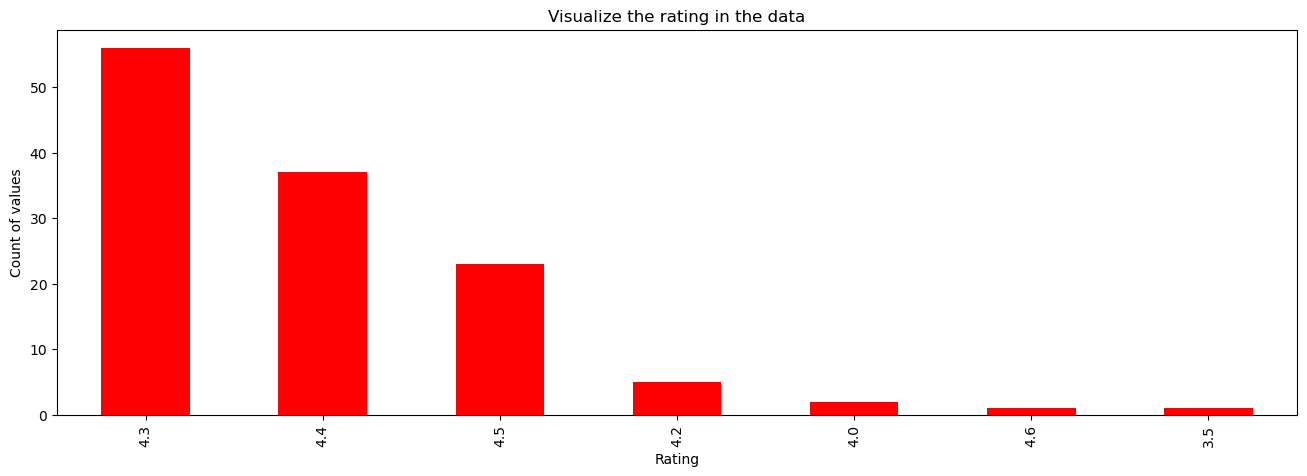

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
final_df['Rating'].value_counts().plot(kind='bar',title="Visualize the rating in the data",color='red',figsize=(16,5))
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

In [17]:
final_df['Prices']=final_df['Prices'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  125 non-null    object 
 1   Prices        125 non-null    int32  
 2   Rating        125 non-null    float64
 3   RAM_ROM       125 non-null    object 
 4   RAM           125 non-null    object 
 5   ROM           125 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 6.3+ KB


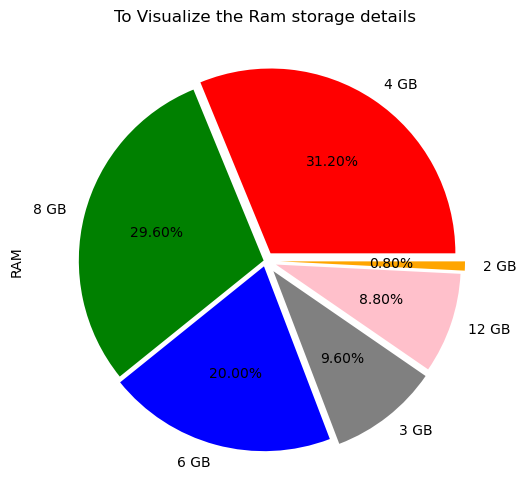

In [29]:
final_df['RAM'].value_counts().plot(kind='pie',explode=[0.05,0.01,0.03,0.07,0.06,0.08],
    labels=['4 GB','8 GB','6 GB','3 GB','12 GB','2 GB'],
    colors=['red','green','blue','gray','pink','orange'],
    autopct='%1.2f%%',title='To Visualize the Ram storage details',figsize=(14,6))
plt.show()

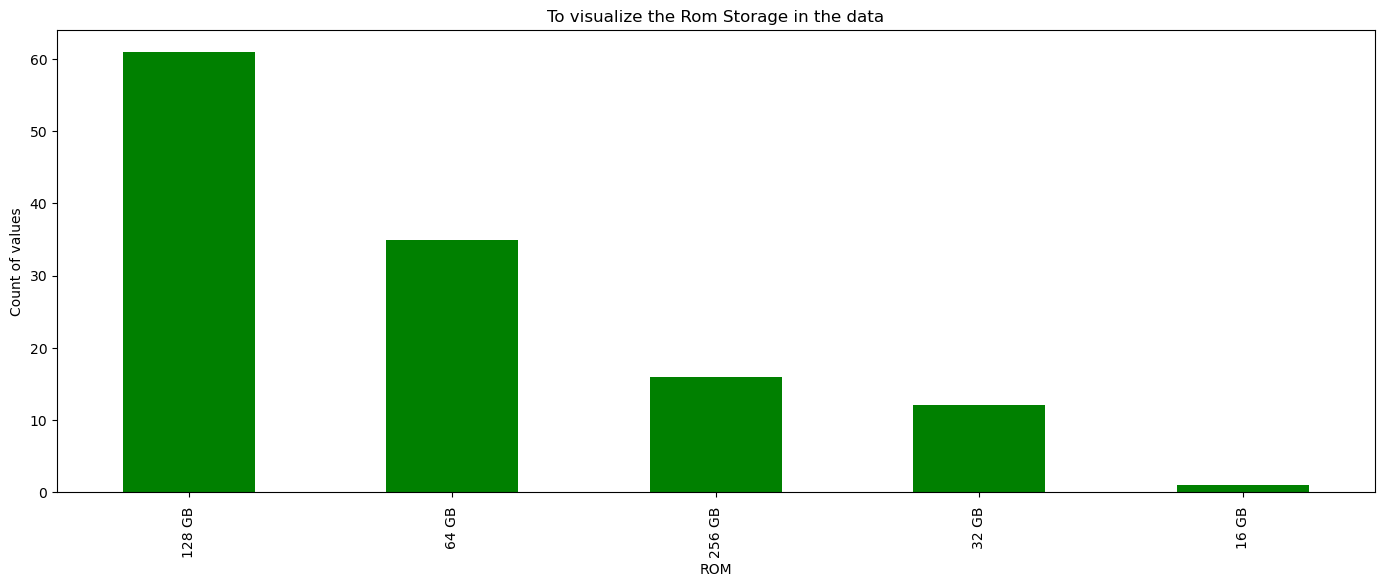

In [31]:
final_df['ROM'].value_counts().plot(kind='bar',color='g',title="To visualize the Rom Storage in the data",figsize=(17,6))
plt.xlabel("ROM")
plt.ylabel("Count of values")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


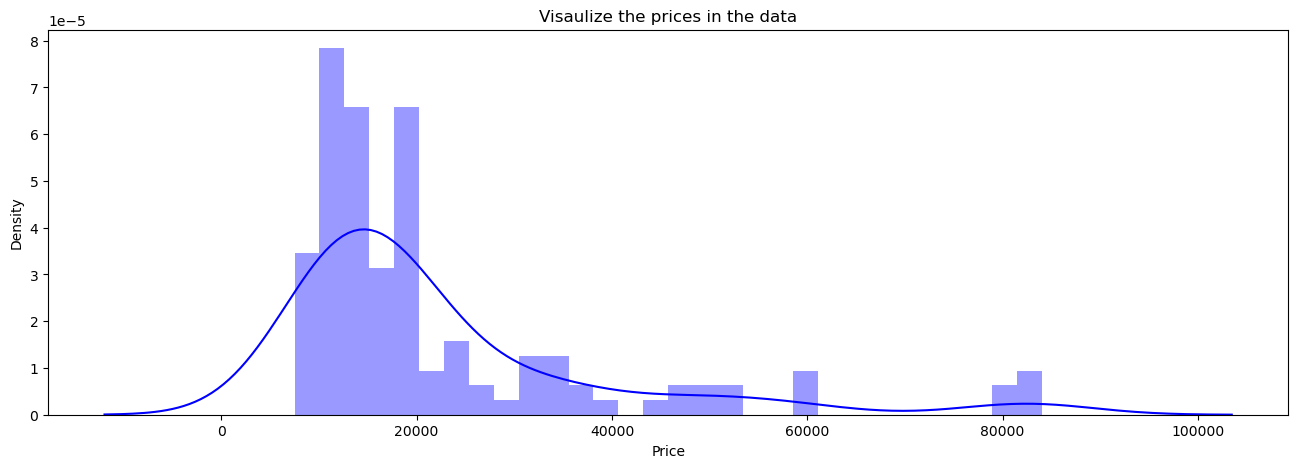

In [40]:
plt.figure(figsize=(16,5))
sns.distplot(final_df['Prices'],kde=True,bins=30,color='b')
plt.title("Visaulize the prices in the data")
plt.xlabel("Price")
plt.show()

In [41]:
final_df.columns

Index(['Mobile_Model', 'Prices', 'Rating', 'RAM_ROM', 'RAM', 'ROM'], dtype='object')

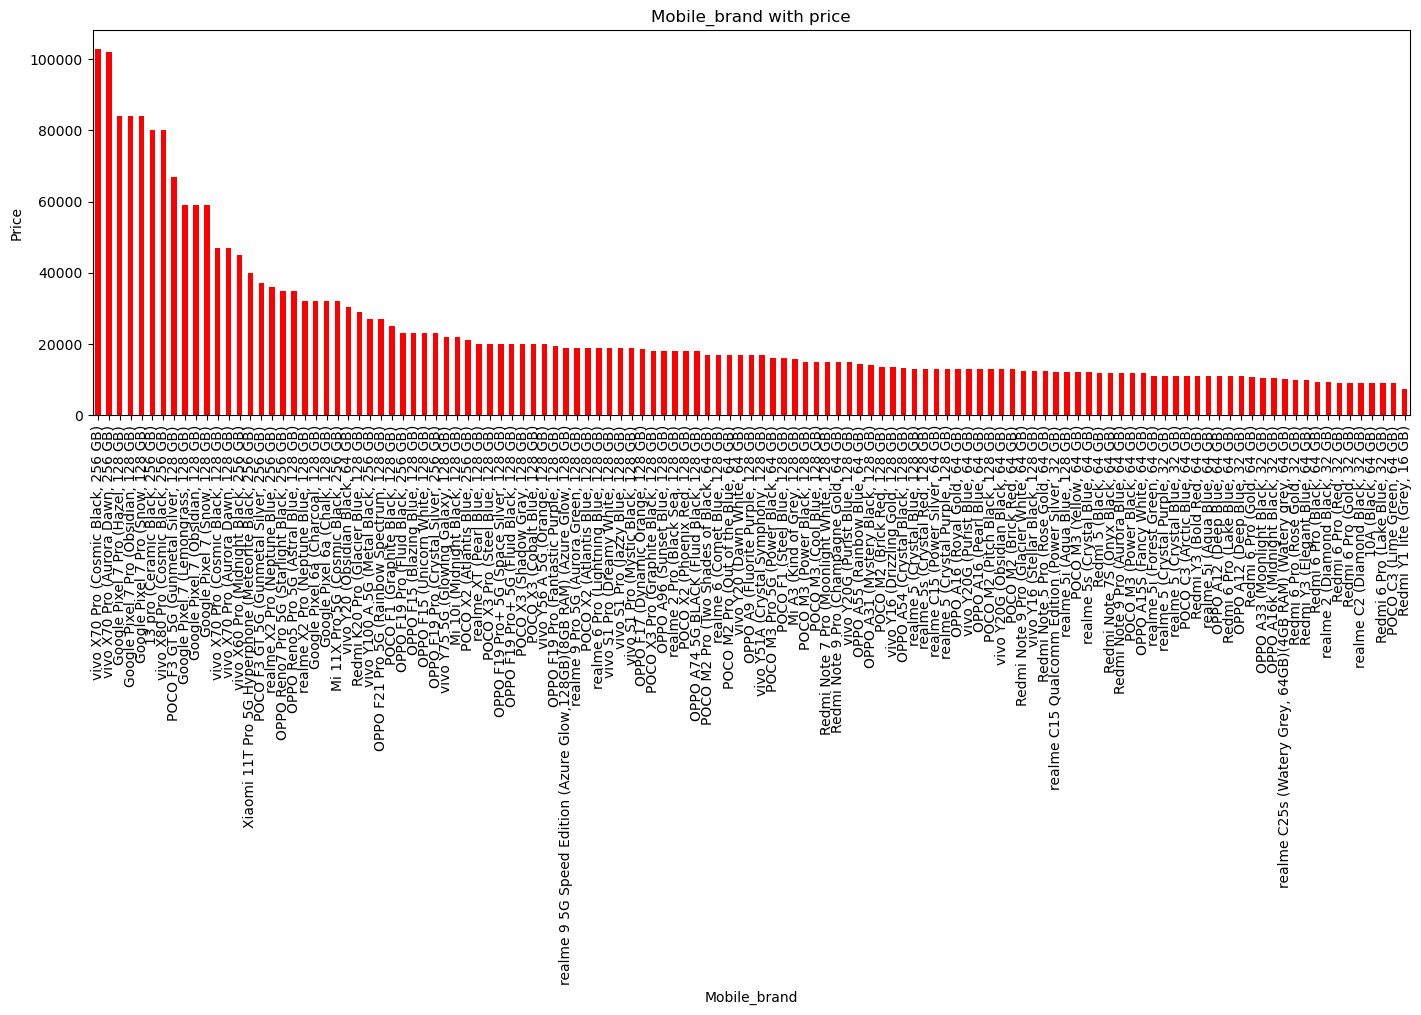

In [44]:
final_df.groupby(['Mobile_Model'])['Prices'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(17,5),color='r',title="Mobile_brand with price")
plt.xlabel("Mobile_brand")
plt.ylabel("Price")
plt.show()

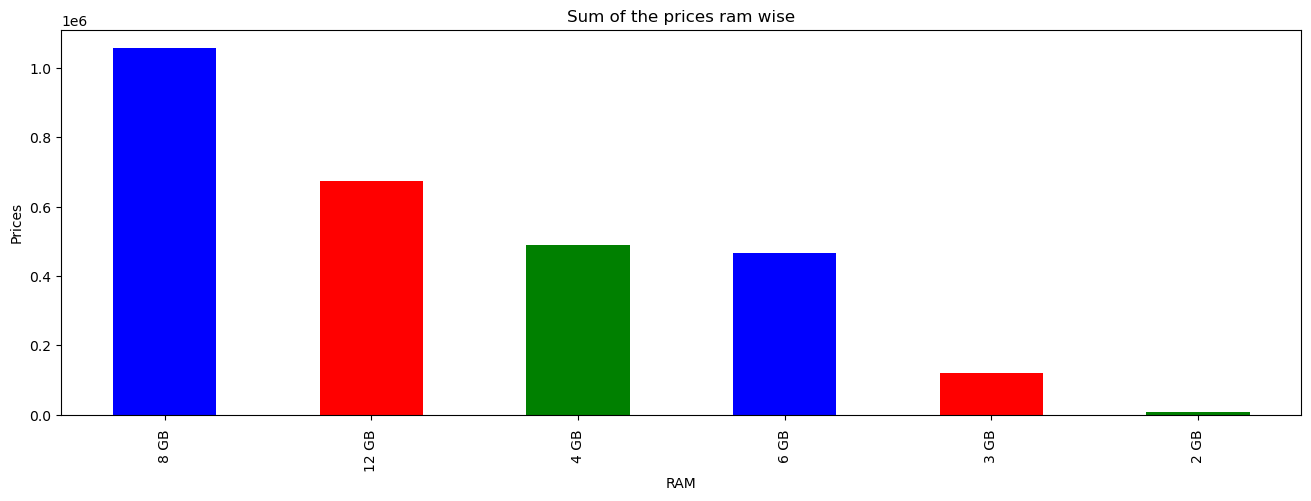

In [53]:
#To calculate the sum of the ram prices in the data
final_df.groupby(['RAM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(16,5),title="The sum of the Ram Prices",color=['blue','red','green'])
plt.xlabel("RAM")
plt.ylabel("Prices")
plt.show()

In [ ]:
print(len(mobile_brand))
print(len(prices))
print(len(ratings))
print(len(ram_and_row))

In [ ]:
vivo.to_csv('vivo.csv')

In [ ]:
#checking the length
len(respond.text)
web_page=respond.text
type(web_page)

In [ ]:
doc=BeautifulSoup(web_page,'html.parser')
google_pixel=doc.find_all('div',{'class':'_4rR01T'})
ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
rating=doc.find_all('div',{'class':'_3LWZlK'})
a=rating[0].text.strip()

In [ ]:
ram_and_row[0].text.strip()

In [ ]:
print(len(google_pixel))
print(len(ram_and_row))
print(len(rating))

In [ ]:
print(len(mobile))
print(len(ram))
print(len(brand_rating))

In [ ]:
mobile=[]
for brand in google_pixel:
    mobile.append(brand.text)
ram=[]
for ram_row in ram_and_row:
    ram.append(ram_row.text)
brand_rating=[]
for mobile_rating in rating:
    brand_rating.append(mobile_rating.text)
mobile_price=doc.find_all('div',{'class':'_30jeq3 _1_WHN1'})
price=[]
for price_of_mobile in mobile_price:
    price.append(price_of_mobile.text)
mobile_reviews={
    'brand':mobile,
    'Ram_ROM':ram,
    'Rating':brand_rating,
    'price':price
}
pd.DataFrame(mobile_reviews)

In [ ]:
mobile=[]
ram_row=[]
mobile_rating=[]
mobile_brands=doc.find_all('div',{'class':'_4rR01T'})
ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
rating=doc.find_all('div',{'class':'_3LWZlK'})
for brands in mobile_brands:
    mobile.append(brands.text)
for ram in ram_and_row:
    ram_row.append(ram.text)
for rating_mobile in rating:
    mobile_rating.append(rating_mobile.text)
ram_row
# mobile_reviews={
#     'brand':mobile[],
#     'Ram_ROM':ram_row[],
#     'Rating':mobile_rating[]
# }
# pd.DataFrame(mobile_reviews)

In [ ]:
def get_html_code():
    url='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception ('failed to load the page{}'.format(url))
    doc=BeautifulSoup(url,'html.parser')
    return doc
doc=get_html_code()

In [ ]:
mobile_models(doc)

In [ ]:
def mobile_models(doc):
    google_pixel=doc.find_all('div',{'class':'_4rR01T'})
    mobile_model=[]
    for mobile in google_pixel:
        mobile_model.append(mobile.text)
        return mobile_model
def ram_and_row(doc):
    ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
    ram_and_row=[]
    for ram_row in ram_and_row:
        ram_and_row.append(ram_row.text)
        return ram_and_row
def mobile_rating(doc):
    mobile_rating=[]
    rating=doc.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
        return mobile_rating

In [ ]:

def scrap_the_data():
    page_link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
    respond = requests.get(page_link)
    if respond.status_code != 200:
        raise Exception('failed to load the {}'.format(respond))
    doc = BeautifulSoup(respond.text, 'html.parser')
    mobile_brands = {
        'mobile_brand': mobile_models(doc),
        'RAM_ROM': ram_and_row(doc),
        'Rating': mobile_rating(doc)
    }
    return pd.DataFrame(mobile_brands)

In [ ]:
scrap_the_data()